In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]


df = pd.read_csv('data/crypto.csv')
df

,Asset_Name,timestamp,Close
0,Bitcoin Cash,2018-01-01,2374.5900
1,Bitcoin Cash,2018-01-02,2323.3200
2,Bitcoin Cash,2018-01-03,2551.2850
3,Bitcoin Cash,2018-01-04,2557.6467
4,Bitcoin Cash,2018-01-05,2354.4433
...,...,...,...
18097,Dogecoin,2021-09-17,0.2416
18098,Dogecoin,2021-09-18,0.2401
18099,Dogecoin,2021-09-19,0.2413
18100,Dogecoin,2021-09-20,0.2331


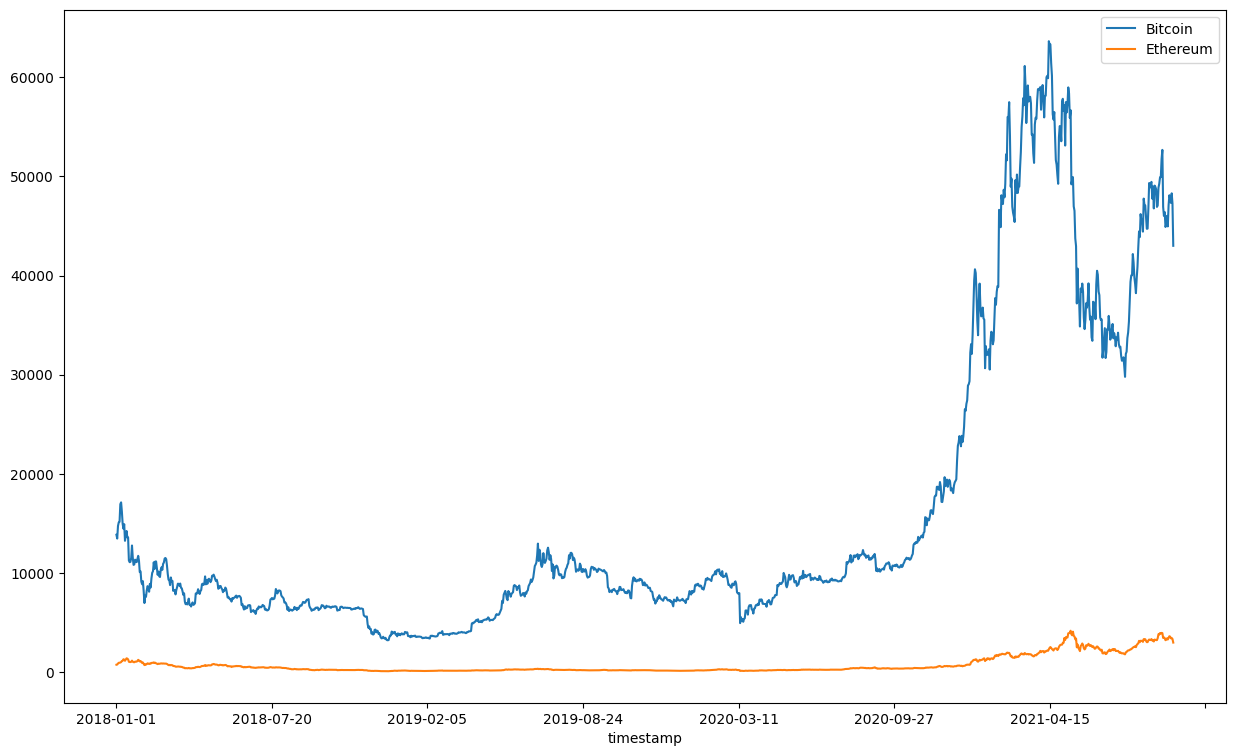

In [21]:
group = df2[(df2['Asset_Name']  == 'Bitcoin') | (df2['Asset_Name'] == 'Ethereum')]

fig, ax= plt.subplots(figsize=(15,9))

for name, group in group.groupby(by='Asset_Name'):
    group.plot(x='timestamp', y='Close', ax=ax, label=name)

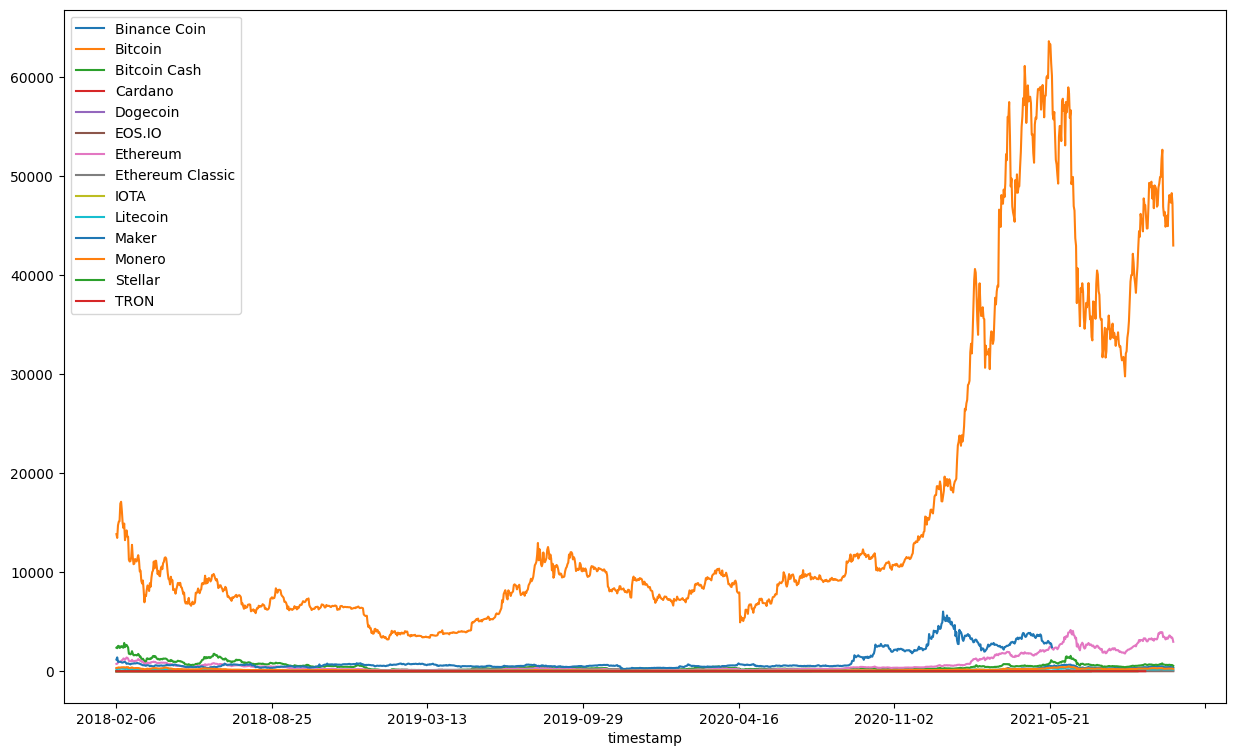

In [22]:
#part 1 make a graph for all currencys


fig, ax= plt.subplots(figsize=(15,9))

for name, group in df2.groupby(by='Asset_Name'):
    group.plot(x='timestamp', y='Close', ax=ax, label=name)

plt.show()

In [4]:
#Q2

In [23]:


bit = df2[df2['Asset_Name'] == 'Bitcoin']
#bit = bit['Close'].to_frame()

#bit[['Close', 'timestamp']].plot(label='bit',
                                  #figsize=(16, 8))
bit

,Asset_Name,timestamp,Close
2720,Bitcoin,2018-01-01,13850.1760
2721,Bitcoin,2018-01-02,13468.6980
2722,Bitcoin,2018-01-03,14743.4240
2723,Bitcoin,2018-01-04,15107.7920
2724,Bitcoin,2018-01-05,15158.4920
...,...,...,...
4075,Bitcoin,2021-09-17,47769.5096
4076,Bitcoin,2021-09-18,47333.4914
4077,Bitcoin,2021-09-19,48295.5087
4078,Bitcoin,2021-09-20,47272.4743


In [24]:
bit = bit[['Close','timestamp']].copy()
bit['SMA3'] = bit['Close'].rolling(3).mean()
bit['SMA7'] = bit['Close'].rolling(7).mean()
bit['SMA14'] = bit['Close'].rolling(14).mean()
bit.dropna(inplace=True)
bit.head()

,Close,timestamp,SMA3,SMA7,SMA14
2733,14228.8633,2018-01-14,13761.969767,14540.121686,14868.839557
2734,13582.4852,2018-01-15,13875.969500,14169.867786,14849.718786
2735,13581.8533,2018-01-16,13797.733933,13975.564257,14857.801307
2736,11256.2000,2018-01-17,12806.846167,13517.426543,14608.713879
2737,11082.9950,2018-01-18,11973.682767,12969.920400,14321.228379


<Axes: xlabel='timestamp'>

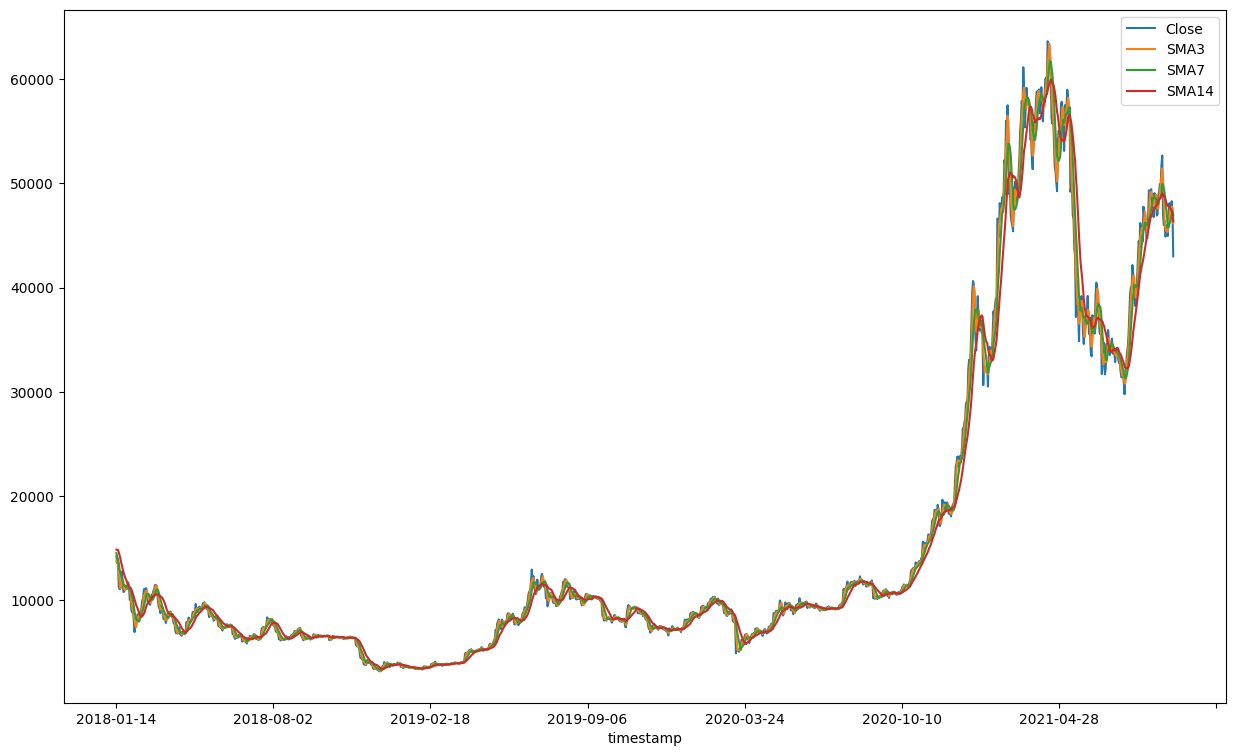

In [11]:
bit.set_index('timestamp')[['Close', 'SMA3', 'SMA7', 'SMA14']].plot(label='Bitcoin',figsize=(15,9))

In [8]:
#Q3


<Axes: xlabel='Asset_Name'>

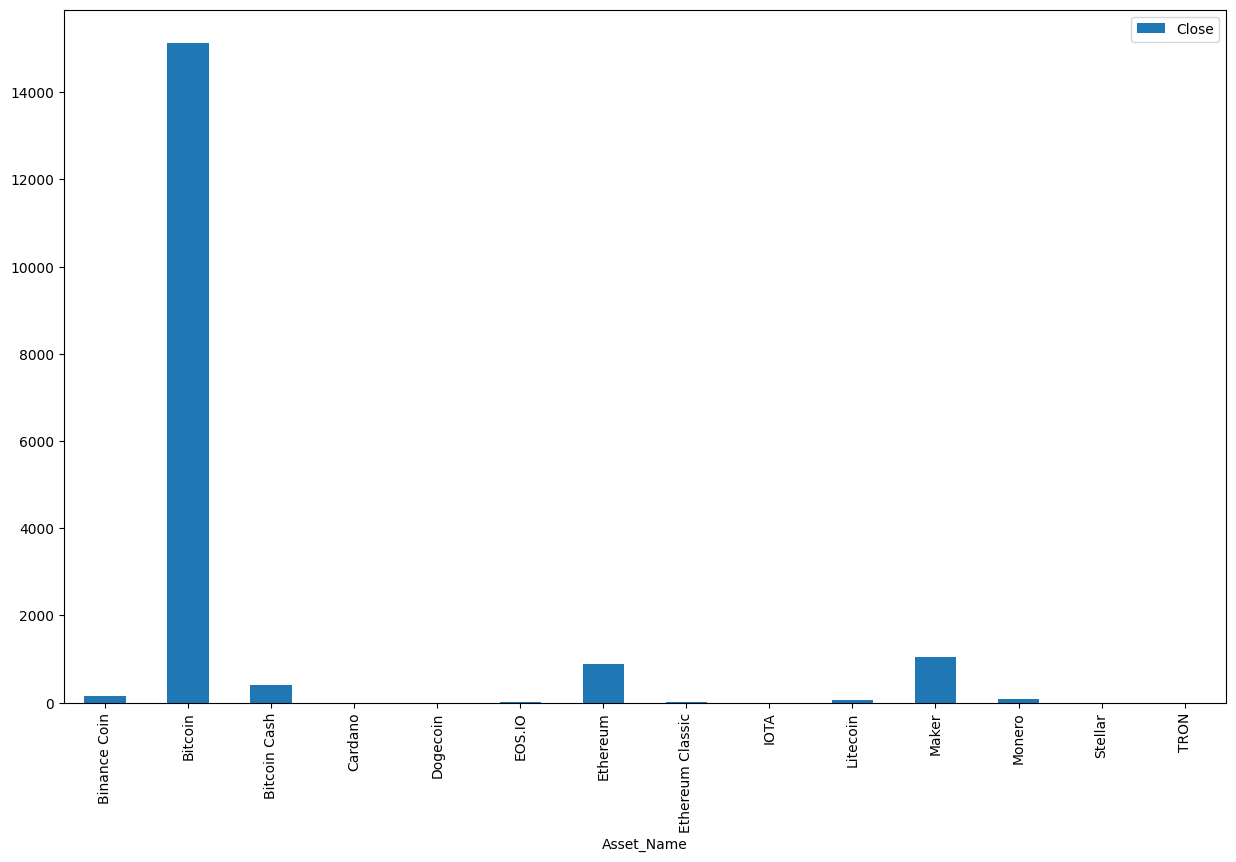

In [26]:
dfsd = df2.groupby(['Asset_Name'])['Close'].std().to_frame()

dfsd
dfsd.plot(kind = 'bar')

#df2 is all assetnames, df is just bitcoin and ethereum

<Axes: xlabel='timestamp'>

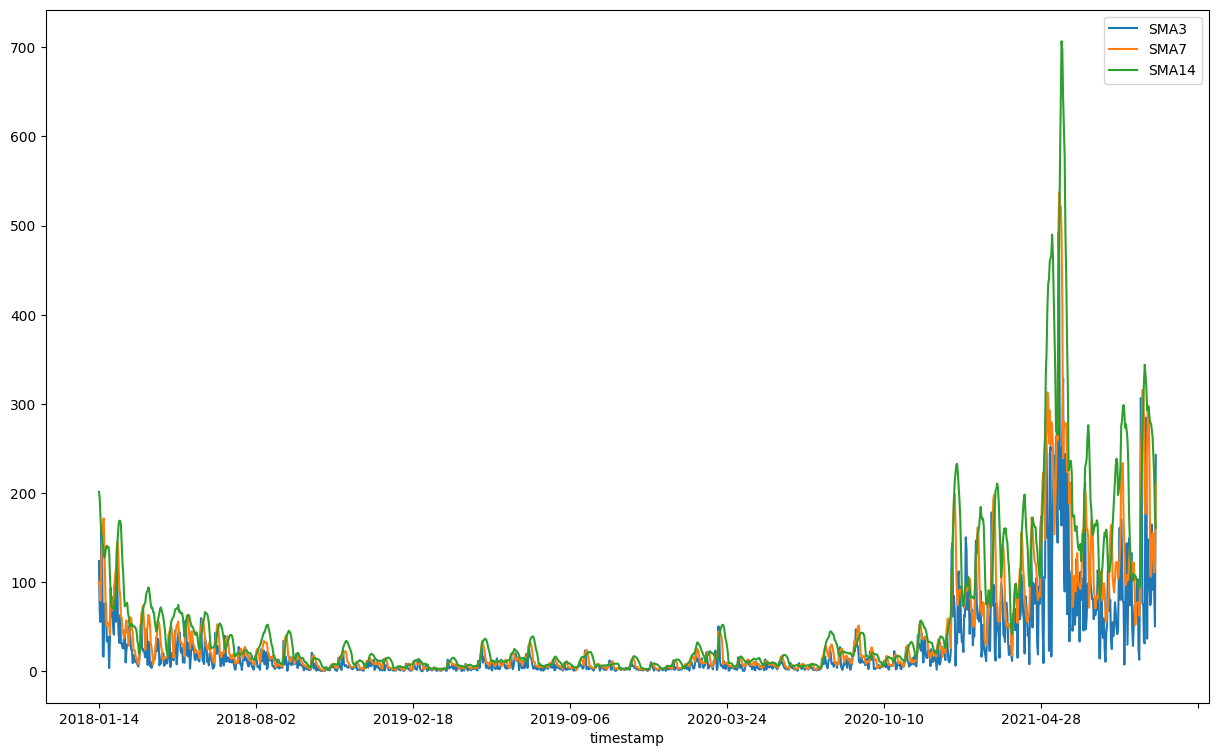

In [27]:
eth = df[df['Asset_Name'] == 'Ethereum']



eth = eth[['Close','timestamp']].copy()
eth['SMA3'] = eth['Close'].rolling(3).std()
eth['SMA7'] = eth['Close'].rolling(7).std()
eth['SMA14'] = eth['Close'].rolling(14).std()
eth.dropna(inplace=True)
eth.head()

eth.set_index('timestamp')[['SMA3', 'SMA7', 'SMA14']].plot(label='Ethereum',figsize=(15,9))

In [28]:
#Q4

<Axes: xlabel='timestamp'>

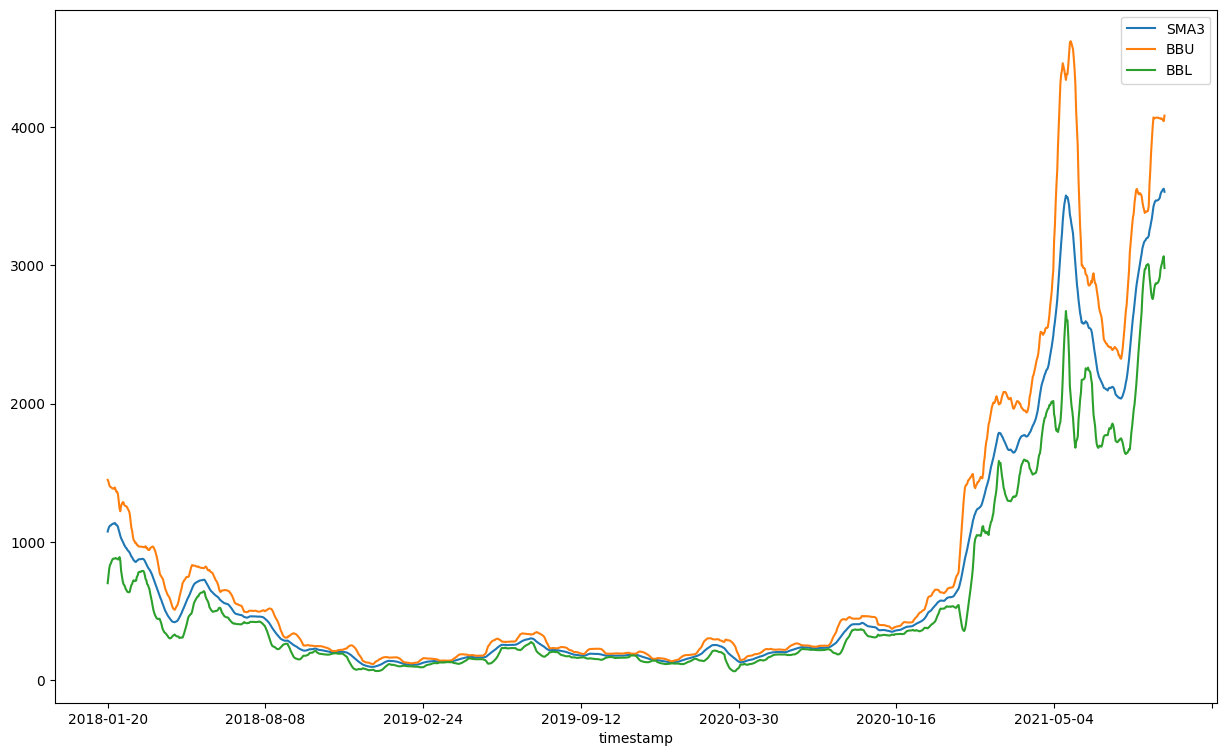

In [29]:
eth = df[df['Asset_Name'] == 'Ethereum']

eth = eth[['Close','timestamp']].copy()
eth['SMA3'] = eth['Close'].rolling(20).mean()
eth['BBU'] = eth['Close'].rolling(20).std() + eth['Close'].rolling(20).std() + eth['SMA3']
eth['BBL'] = eth['SMA3'] - eth['Close'].rolling(20).std() - eth['Close'].rolling(20).std()

eth.dropna(inplace=True)
eth.head()

eth.set_index('timestamp')[['SMA3', 'BBU', 'BBL']].plot(label='Ethereum',figsize=(15,9))